## Определение перспективного тарифа для телеком компании
**Описание проекта**

Вы аналитик компании «Мегалайн» — федерального оператора сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
Вам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В вашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

## Шаг 1. Откройте файл с данными и изучите общую информацию

In [1]:
import pandas as pd
df_calls=pd.read_csv('//datasets/calls.csv')
df_internet=pd.read_csv('/datasets/internet.csv')
df_messages=pd.read_csv('/datasets/messages.csv')
df_tariffs=pd.read_csv('/datasets/tariffs.csv')
df_users=pd.read_csv('/datasets/users.csv')



In [2]:
print(df_calls.head())
print(df_calls.info())

       id   call_date  duration  user_id
0  1000_0  2018-07-25      0.00     1000
1  1000_1  2018-08-17      0.00     1000
2  1000_2  2018-06-11      2.85     1000
3  1000_3  2018-09-21     13.80     1000
4  1000_4  2018-12-15      5.18     1000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB
None


In [3]:
print(df_internet.head())
print(df_internet.info())

   Unnamed: 0      id  mb_used session_date  user_id
0           0  1000_0   112.95   2018-11-25     1000
1           1  1000_1  1052.81   2018-09-07     1000
2           2  1000_2  1197.26   2018-06-25     1000
3           3  1000_3   550.27   2018-08-22     1000
4           4  1000_4   302.56   2018-09-24     1000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB
None


In [4]:
print(df_messages.head())
print(df_messages.info())

       id message_date  user_id
0  1000_0   2018-06-27     1000
1  1000_1   2018-10-08     1000
2  1000_2   2018-08-04     1000
3  1000_3   2018-06-16     1000
4  1000_4   2018-12-05     1000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB
None


In [5]:
print(df_tariffs.head())
print(df_tariffs.info())

   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   rub_monthly_fee  rub_per_gb  rub_per_message  rub_per_minute tariff_name  
0              550         200                3               3       smart  
1             1950         150                1               1       ultra  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes
None


In [6]:
print(df_users.head(20))
print(df_users.info())

    user_id  age  churn_date              city first_name   last_name  \
0      1000   52         NaN         Краснодар     Рафаил   Верещагин   
1      1001   41         NaN            Москва       Иван        Ежов   
2      1002   59         NaN       Стерлитамак    Евгений   Абрамович   
3      1003   23         NaN            Москва      Белла    Белякова   
4      1004   68         NaN       Новокузнецк    Татьяна    Авдеенко   
5      1005   67         NaN  Набережные Челны   Афанасий      Горлов   
6      1006   21         NaN         Ульяновск     Леонид    Ермолаев   
7      1007   65         NaN            Москва        Юна    Березина   
8      1008   63         NaN         Челябинск     Рустэм   Пономарёв   
9      1009   24         NaN             Пермь   Василиса     Блинова   
10     1010   26         NaN            Тюмень     Эдуард     Кононов   
11     1011   44         NaN            Самара   Веселина      Алёшко   
12     1012   38         NaN   Санкт-Петербург     

**Вывод:**

Файлы с данными открыты и изучены.Теперь можно подготовить и лучше изучить данные.

<div style="border:solid green 2px; padding: 20px"> <h1 style="color:green; margin-bottom:20px">Комментарий наставника</h1>

Молодец, что провёл первичный анализ полученных данных, это всегда быстро помогает понять с чем предстоит работать, по выводам нареканий нет - всё верно и точно
</div>

## Шаг 2. Подготовьте данные

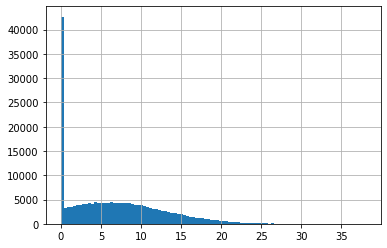

In [7]:
import matplotlib.pyplot as plt
df_calls['duration'].hist(bins=100)

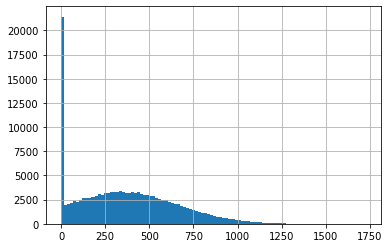

In [8]:
df_internet['mb_used'].hist(bins=100)

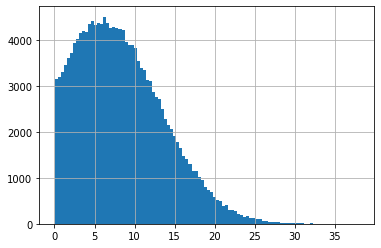

In [9]:
calls=df_calls.query('duration > 0')
calls['duration'].hist(bins=100)

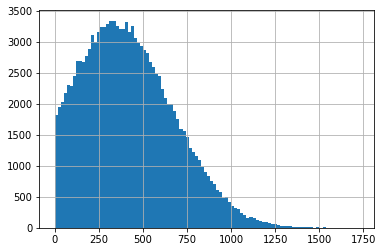

In [10]:
internet=df_internet.query('mb_used > 0')
internet['mb_used'].hist(bins=100)

In [11]:
<div style="border:solid  orange  2px; padding: 20px"> <h1 style="color: orange ; margin-bottom:20px">Комментарий наставника</h1>

не забывай подписывать обе оси на графиках и указывать осмысленное название для графикаpd.set_option('mode.chained_assignment', None)
calls['call_date']=pd.to_datetime(calls['call_date'], format='%Y-%m-%d')
internet['session_date']=pd.to_datetime(internet['session_date'], format='%Y-%m-%d')
df_messages['message_date']=pd.to_datetime(df_messages['message_date'], format='%Y-%m-%d')


In [12]:
calls['month']=pd.DatetimeIndex(calls['call_date']).month
internet['month']=pd.DatetimeIndex(internet['session_date']).month
df_messages['month']=pd.DatetimeIndex(df_messages['message_date']).month


In [13]:
calls['duration']=round(calls['duration'])
print(calls.head())


       id  call_date  duration  user_id  month
2  1000_2 2018-06-11       3.0     1000      6
3  1000_3 2018-09-21      14.0     1000      9
4  1000_4 2018-12-15       5.0     1000     12
7  1000_7 2018-08-22      18.0     1000      8
8  1000_8 2018-09-15      18.0     1000      9


In [14]:
internet['mb_used']=round(internet['mb_used'])
print(internet.head())

   Unnamed: 0      id  mb_used session_date  user_id  month
0           0  1000_0    113.0   2018-11-25     1000     11
1           1  1000_1   1053.0   2018-09-07     1000      9
2           2  1000_2   1197.0   2018-06-25     1000      6
3           3  1000_3    550.0   2018-08-22     1000      8
4           4  1000_4    303.0   2018-09-24     1000      9


In [15]:
print(df_messages.head())

       id message_date  user_id  month
0  1000_0   2018-06-27     1000      6
1  1000_1   2018-10-08     1000     10
2  1000_2   2018-08-04     1000      8
3  1000_3   2018-06-16     1000      6
4  1000_4   2018-12-05     1000     12


Для таблиц с звонками, интернетом и смс добавил столбец с месяцем.
Т.к оператор округляет значения минут и мегабайт для списания оплаты, поэтому считать суммарные траты тоже будем по округленным значениям для корректного отображения итоговых сумм за месяц.

In [16]:
calls_pivot_table=calls.pivot_table(index=['user_id','month'],values=['duration'],aggfunc=['sum','count'])
internet_pivot_table=internet.pivot_table(index=['user_id','month'], values=['mb_used'],aggfunc=['sum'])
messages_pivot_table=df_messages.pivot_table(index=['user_id','month'],values=['id'],aggfunc=['count'])
calls_pivot_table.columns = ['calls_sum', 'calls_count']
internet_pivot_table.columns = ['mb_sum']
messages_pivot_table.columns = ['messages_count']

In [17]:
users_month_pivot = calls_pivot_table.join([internet_pivot_table, messages_pivot_table])

In [18]:
users_month_pivot['id'] = users_month_pivot.index.get_level_values('user_id')
users_month_pivot['month'] = users_month_pivot.index.get_level_values('month')
users_month_pivot = users_month_pivot.reset_index(drop = True)
users_month_pivot = users_month_pivot.fillna(0)

In [19]:
df_users.set_axis(['id', 
                'age', 
                'churn_date', 
                'city', 
                'first_name', 
                'last_name', 
                'reg_date', 
                'tariff_name'], 
               axis = 'columns', 
               inplace = True)

In [20]:
users_month_pivot = users_month_pivot.merge(df_users, on='id')
users_month_pivot = users_month_pivot.merge(df_tariffs, on='tariff_name')

In [21]:
import math

def payed(data):
    minuts_over = 0
    gb_over = 0
    message_over = 0
    
    tar_min = data['minutes_included']
    if data['calls_sum'] > tar_min:
        minuts_over = data['calls_sum'] - tar_min
    
    tar_mess = data['messages_included']
    if data['messages_count'] > tar_mess:
        message_over = data['messages_count'] - tar_mess
        
    tar_mb = data['mb_per_month_included']
    if data['mb_sum'] > tar_mb:
        gb_over = (data['mb_sum'] - tar_mb) / 1024
        
    summa = math.ceil(data['rub_monthly_fee'] + 
             minuts_over * data['rub_per_minute'] + 
             message_over * data['rub_per_message'] + 
             gb_over * data['rub_per_gb'])
    
    return summa

users_month_pivot['payed'] = users_month_pivot.apply(payed, axis=1)

При помощи цикла посчитаны траты за месяц, где можно увидеть траты для каждого пользователя.
Далее разделим нашу таблицу по тарифам, для удоства дальнейшей работы и анализа.

In [22]:
users_month_pivot_ultra = users_month_pivot.query('tariff_name == "ultra"')
users_month_pivot_smart = users_month_pivot.query('tariff_name == "smart"')

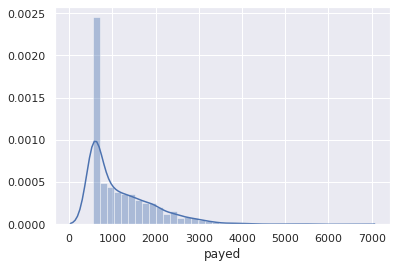

In [23]:
import seaborn as sns, numpy as np
sns.set(); np.random.seed(0)
smart = users_month_pivot_smart['payed']
smart_payed = sns.distplot(smart)


Данные выручки пользователей тарифа **Смарт**

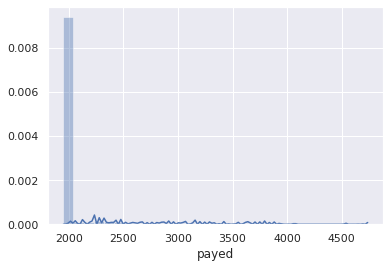

In [24]:
ultra = users_month_pivot_ultra['payed']
ultra_payed = sns.distplot(ultra)


Данные выручки пользователей тарифа **Ультра**

In [25]:
users_month_pivot_smart['calls_sum']=(users_month_pivot_smart['calls_sum']).astype('int')
users_month_pivot_smart['calls_count']=users_month_pivot_smart['calls_count'].astype('int')
users_month_pivot_smart['mb_sum']=users_month_pivot_smart['mb_sum'].astype('int')
users_month_pivot_smart['messages_count']=users_month_pivot_smart['messages_count'].astype('int')

In [26]:
users_month_pivot_ultra['calls_sum']=users_month_pivot_ultra['calls_sum'].astype('int')
users_month_pivot_ultra['calls_count']=users_month_pivot_ultra['calls_count'].astype('int')
users_month_pivot_ultra['mb_sum']=users_month_pivot_ultra['mb_sum'].astype('int')
users_month_pivot_ultra['messages_count']=users_month_pivot_ultra['messages_count'].astype('int')

Для более удобного восприятия данные приведены к целочисленным значениям.

In [27]:
result_smart=users_month_pivot_smart.pivot_table(index=['last_name','first_name','calls_sum','calls_count','mb_sum','messages_count','month'], values='payed')
print(result_smart.head(20))

                                                                        payed
last_name first_name calls_sum calls_count mb_sum messages_count month       
Ёркин     Пётр       230       35          8779   32             4        550
                     423       51          17696  47             5       1007
                     466       57          10475  49             10       550
                     517       61          21691  51             8       1841
                     562       70          16617  55             12       997
                     581       68          19666  52             6       1641
                     588       69          14772  53             9        823
                     631       68          15823  57             7       1055
                     703       77          14528  54             11      1171
Ёркина    Галина     158       22          16870  4              11       845
                     252       29          14859  4             

In [28]:
result_ultra=users_month_pivot_ultra.pivot_table(index=['last_name','first_name','calls_sum','calls_count','mb_sum','messages_count','month'], values='payed')
print(result_ultra.head(20))

                                                                        payed
last_name first_name calls_sum calls_count mb_sum messages_count month       
Ёлчина    Валерия    347       38          9999   44             12      1950
                     510       63          12476  40             7       1950
                     770       97          20561  84             8       1950
                     772       94          28259  97             9       1950
                     803       107         19369  89             11      1950
                     1026      127         18714  101            10      1950
Ёрохова   Розалия    0         1           10026  31             6       1950
                     12        1           32757  111            7       2249
                     14        4           17145  83             11      1950
                     26        5           29921  106            10      1950
                     41        6           27948  89            

Наша таблица с итоговыми значениями помесячной выручки с каждого пользователя получена.

Теперь проанализируем данные.

## Шаг 3. Проанализируйте данные

**Пронанализируем тариф Ультра**

Среднее колличество минут в месяц 516.8278775079198
Медиана колличества минут в месяц 499.0
Дисперсия минут в месяц 83027.63563255945
Стандартное отклонение минут в месяц 288.1451641665351


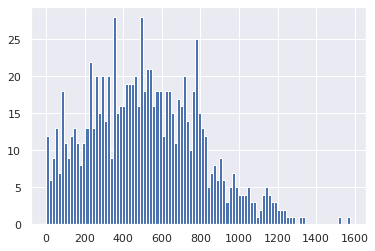

In [29]:
users_month_pivot_ultra['calls_sum'].hist(bins=100)
print('Среднее колличество минут в месяц',users_month_pivot_ultra['calls_sum'].mean())
print('Медиана колличества минут в месяц',users_month_pivot_ultra['calls_sum'].median())
print('Дисперсия минут в месяц', np.var(users_month_pivot_ultra['calls_sum']))
print('Стандартное отклонение минут в месяц',np.sqrt(np.var(users_month_pivot_ultra['calls_sum'])))


Гистограмма имеет положительную скошенность.

Среднее колличество трафика в месяц 19471.605068637804
Медиана колличества трафика в месяц 19315.0
Дисперсия трафика в месяц 102466110.60432489
Стандартное отклонение трафика в месяц 10122.554549338072


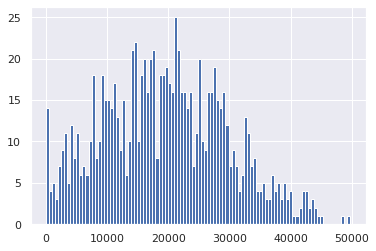

In [30]:
users_month_pivot_ultra['mb_sum'].hist(bins=100)
print('Среднее колличество трафика в месяц',users_month_pivot_ultra['mb_sum'].mean())
print('Медиана колличества трафика в месяц',users_month_pivot_ultra['mb_sum'].median())
print('Дисперсия трафика в месяц', np.var(users_month_pivot_ultra['mb_sum']))
print('Стандартное отклонение трафика в месяц',np.sqrt(np.var(users_month_pivot_ultra['mb_sum'])))

Гистограмма имеет положительную скошенность.

Среднее колличество смс в месяц 48.75923970432946
Медиана колличества смс в месяц 39.0
Дисперсия смс в месяц 2169.4330587672516
Стандартное отклонение смс в месяц 46.577173151311484


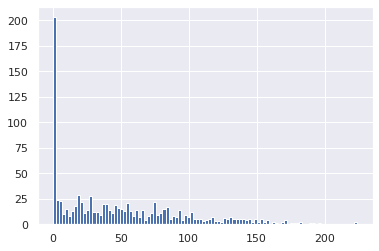

In [31]:
users_month_pivot_ultra['messages_count'].hist(bins=100)
print('Среднее колличество смс в месяц',users_month_pivot_ultra['messages_count'].mean())
print('Медиана колличества смс в месяц',users_month_pivot_ultra['messages_count'].median())
print('Дисперсия смс в месяц', np.var(users_month_pivot_ultra['messages_count']))
print('Стандартное отклонение смс в месяц',np.sqrt(np.var(users_month_pivot_ultra['messages_count'])))

Гистограмма имеет положительную скошенность.

**Пронанализируем тариф Смарт**

Среднее колличество минут в месяц 395.6888788833859
Медиана колличества минут в месяц 399.0
Дисперсия минут в месяц 31901.18415817578
Стандартное отклонение минут в месяц 178.60902597062608


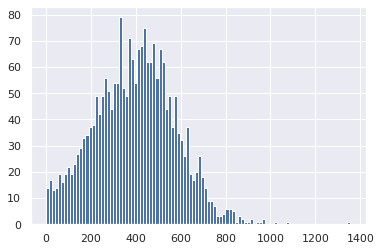

In [32]:
users_month_pivot_smart['calls_sum'].hist(bins=100)
print('Среднее колличество минут в месяц',users_month_pivot_smart['calls_sum'].mean())
print('Медиана колличества минут в месяц',users_month_pivot_smart['calls_sum'].median())
print('Дисперсия минут в месяц', np.var(users_month_pivot_smart['calls_sum']))
print('Стандартное отклонение минут в месяц',np.sqrt(np.var(users_month_pivot_smart['calls_sum'])))

Гистограмма имеет отрицательную скошенность.

Среднее колличество трафика в месяц 16210.698334083747
Медиана колличества трафика в месяц 16505.0
Дисперсия трафика в месяц 34515635.80093824
Стандартное отклонение трафика в месяц 5875.000919228714


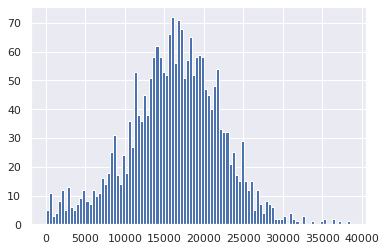

In [33]:
users_month_pivot_smart['mb_sum'].hist(bins=100)
print('Среднее колличество трафика в месяц',users_month_pivot_smart['mb_sum'].mean())
print('Медиана колличества трафика в месяц',users_month_pivot_smart['mb_sum'].median())
print('Дисперсия трафика в месяц', np.var(users_month_pivot_smart['mb_sum']))
print('Стандартное отклонение трафика в месяц',np.sqrt(np.var(users_month_pivot_smart['mb_sum'])))

Гистограмма имеет отрицательную скошенность.

Среднее колличество смс в месяц 33.392165691130124
Медиана колличества смс в месяц 28.0
Дисперсия смс в месяц 798.8462060707005
Стандартное отклонение смс в месяц 28.26386750023253


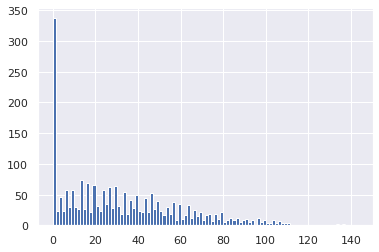

In [34]:
users_month_pivot_smart['messages_count'].hist(bins=100)
print('Среднее колличество смс в месяц',users_month_pivot_smart['messages_count'].mean())
print('Медиана колличества смс в месяц',users_month_pivot_smart['messages_count'].median())
print('Дисперсия смс в месяц', np.var(users_month_pivot_smart['messages_count']))
print('Стандартное отклонение смс в месяц',np.sqrt(np.var(users_month_pivot_smart['messages_count'])))

Гистограмма имеет положительную скошенность.

**Тариф Ультра.**

Гистограммы у данного тарифа имеют положительную скошенность.
Пользователи данного тарифа не столь активно им пользуются и редко выходят за границы, выделенного им пакета услуг.
Цена данного тарифа говорит о том, что люди, использующие его более обеспечены и готовы переплачивать для того чтобы всегда быть на связи и иметь выход в интернет.

**Тариф Смарт.**

Гистограммы у данного тарифа имеют отрицательную скошенность, за исключением гистограммы смс.
Пользователи данного тарифа активно им пользуются, расходуя имеющийся пакет по максимуму, особенно активно виден расход трафика.Порой пользователи выходят за пределы выделенного им пакета. Исключением расходов является смс, которые используется достаточно мало, скорее всего это работа с банковскими приложениями или т.п.


Пользователи этих тарифов более активно расходуют интернет трафик, нежели смс или звонки, ввиду развия соцсетей и мессенджеров.



## Шаг 4. Проверьте гипотезы

Проверим гипотезу, что выручка пользователей тарифов Смарт и Ультра Равны.

In [35]:
from scipy import stats as st

alpha = 0.05

results = st.ttest_ind(
    users_month_pivot_ultra['payed'], 
    users_month_pivot_smart['payed'])

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 6.840924107901997e-206
Отвергаем нулевую гипотезу


Нулевая и альтернативная гипотезы формируются на основании средних значений трат пользователей для двух тарифов.
Выручка с тарифов Смарт и Ультра не равная, поэтому нулевая гипотеза отвергается.
Можно сделать вывод, что пользователи тарифа Ультра переплачивают за свои услуги.


Проверим гипотезу о том, что средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

In [36]:
moscow_users = users_month_pivot.query('city == "Москва"')
another_users = users_month_pivot.query('city != "Москва"')

In [37]:
alpha = 0.05

results = st.ttest_ind(
    moscow_users['payed'], 
    another_users['payed'])

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.3278037823412776
Не получилось отвергнуть нулевую гипотезу


Нулевая и альтернативная гипотезы формируются на основании средних значений трат пользователей для Москвы и других городов.
Значения трат для Москвы и других городов не сильно отличаются, отсюда делаем вывод, что гипотеза про большую доходность с пользователей из Москвы не подтвердилась. Доходы плюс минус равны вне зависимости от локации пользователей.

## Шаг 5. Напишите общий вывод

**Общий вывод:**
Пользователи тарифа **Смарт** активно им пользуются, расходуя имеющийся пакет по максимуму, особенно активно виден расход трафика.Порой пользователи выходят за пределы выделенного им пакета. Исключением расходов является смс, которые используется достаточно мало, скорее всего это работа с банковскими приложениями или т.п.
Пользователи тарифа **Ультра** не столь активно им пользуются и редко выходят за границы, выделенного им пакета услуг.
Цена данного тарифа говорит о том, что люди, использующие его более обеспечены и готовы переплачивать для того чтобы всегда быть на связи и иметь выход в интернет.

В результате анализа было доказано, что траты пользователей не равны и пользователи тарифа **Ультра** переплачивают за свои услуги.

Вне зависимотси от города проживания, траты пользователей примерно одинаковы и гипотеза о том, что в Москве люди больше платят не подтвердилась.